<a href="https://colab.research.google.com/github/ykato27/Prediction-Models/blob/main/LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 必要なライブラリのインストール
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lightgbm as lgb
import time
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# スコア計算のためのライブラリ
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.datasets import load_boston

In [ ]:
# データセットの読込み
boston = load_boston()

# データフレームの作成
# 説明変数の格納
df = pd.DataFrame(boston.data, columns = boston.feature_names)

# 目的変数の追加
df['MEDV'] = boston.target

# データの中身を確認
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# 学習データと評価データを作成
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:13], df.iloc[:, 13],
                                                    test_size=0.2, random_state=1)

#データを標準化
sc = StandardScaler()
sc.fit(x_train) #学習用データで標準化
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [ ]:
# LightGBM用のデータセットに入れる
lgb_train = lgb.Dataset(x_train_std, y_train)
lgb.test = lgb.Dataset(x_test_std, y_test)

# 評価基準を設定する 
params = {'metric' : 'rmse'}

In [ ]:
# 学習データから回帰モデルを作る
gbm = lgb.train(params, lgb_train)
# 評価データを用いて予測精度を確認する
y_pred = gbm.predict(x_test_std)

In [ ]:
# 評価
# 決定係数(R2)
r2 = r2_score(y_test, y_pred)

# 平均絶対誤差(MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R2 : %.3f" % r2)
print("MAE : %.3f" % mae)

R2 : 0.905
MAE : 2.315


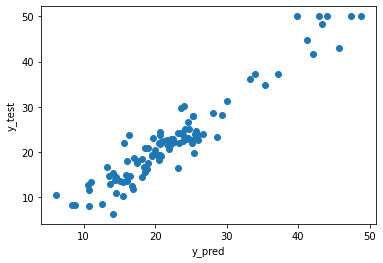

In [ ]:
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.scatter(y_pred, y_test)

plt.show()